<div class="alert alert-block alert-info" style="background-color: #323031; color:#ffffff; border: 0px; -moz-border-radius: 10px; -webkit-border-radius: 10px;padding:25px; width:90%">

# Python for Accounting - Session 3

&nbsp;

Welcome to the Python for Accounting practical session. 

This series of practical sessions consists of three separate sessions, that will teach you to work with stock data and accounting documents in Python. 

<div  class="alert alert-block alert-info" style="color:#1b1b1b; background-color:#f2f2f2; border: 0px; -moz-border-radius: 10px; -webkit-border-radius: 10px;padding:25px; width:90%">
    
    
**What you will learn in this session**
    
Part 1 - Visualizing returns for different time intervals

- creating matplotlib chart objects
- creating and plotting at separate subplots inside a figure
- plotting daily and monthly returns as subplots in one figure

Part 2 - Comparing big tech companies
- Combine financial statements from different companies into a single dataframe 
- Calculate new columns/variables  
- Reshape and prepare a dataframe for plotting
- Create a margin plot and customize appearance with seaborn 
    

<br>
    
<b>What to do when getting stuck</b>:
    <ol>
        <li>Ask the trainer if you struggle to find a solution.</li>
        <li>Search online:</li>
        <ol>
            <li>The answer box on the top of Google's results page</li>
            <li><a href="https://www.stackoverflow.com">stackoverflow.com</a> (task-specific solutions)</li>
            <li><a href="https://www.w3schools.com">w3schools.com</a> (basic python questions)</li>
            <li><a href="https://www.realpython.com">realpython.com</a> (topic-based tutorials)</li>
        </ol>
    </ol>

<br>

&nbsp;

## Calculating new columns for the monthly return rates

The way we have calculate the monthly return rates, we wouldn't be able to add them to the dataframe with the daily returns since we aggregated the data to only one return value per month, whereas the original dataframe has a row for each day.

The `.transform()` method enables us to replicate the monthly returns for as many times as there are days in each different month.

Let us start with the annual returns and compare the output when using `.prod()` and `.transform('prod')`.

In [ ]:
amzn

,High,Low,Open,Close,Volume,Adj Close,daily_ret,daily_ret_1,year,month
Date,,,,,,,,,,
1997-05-15,0.125000,0.096354,0.121875,0.097917,1.443120e+09,0.097917,NaN,NaN,1997,5
1997-05-16,0.098958,0.085417,0.098438,0.086458,2.940000e+08,0.086458,-0.117028,0.882972,1997,5
1997-05-19,0.088542,0.081250,0.088021,0.085417,1.221360e+08,0.085417,-0.012040,0.987960,1997,5
1997-05-20,0.087500,0.081771,0.086458,0.081771,1.093440e+08,0.081771,-0.042685,0.957315,1997,5
1997-05-21,0.082292,0.068750,0.081771,0.071354,3.770640e+08,0.071354,-0.127392,0.872608,1997,5
...,...,...,...,...,...,...,...,...,...,...
2022-11-22,93.349998,90.870003,92.620003,93.199997,6.219200e+07,93.199997,0.008003,1.008003,2022,11
2022-11-23,94.580002,92.830002,93.239998,94.129997,5.941470e+07,94.129997,0.009979,1.009979,2022,11
2022-11-25,94.430000,93.070000,93.790001,93.410004,3.508860e+07,93.410004,-0.007649,0.992351,2022,11


In [ ]:
amzn.groupby('year')['daily_ret_1'].transform('prod')

Date
1997-05-15    2.563830
1997-05-16    2.563830
1997-05-19    2.563830
1997-05-20    2.563830
1997-05-21    2.563830
                ...   
2021-11-12    1.134829
2021-11-15    1.134829
2021-11-16    1.134829
2021-11-17    1.134829
2021-11-18    1.134829
Name: daily_ret_1, Length: 6171, dtype: float64

While using `.prod()` returns the return rate for each year only once, `.transform('prod')` replicates the annual return rate for as many days as there are in each year.

The last row shows us that there are 6170 values when using `.transform('prod')`. This is exactly as many rows the original dataframe has.

In [ ]:
len(amzn)

6171

By using `.transform('prod')` the monthly return rates will directly map onto the rows in the original dataframe, and we can use these values to create a new column for the monthly returns.

In [ ]:
amzn['monthly_ret'] = amzn.groupby(['year', 'month'])['daily_ret_1'].transform('prod')

Below you can see how this has created a new column **monthly_ret** with the product of the values from the **daily_ret_1** column for each month. 

<img src="https://www.dropbox.com/s/kzd1fgatnu8neki/groupby_transform.png?raw=1">

To change these values from a multiplier to a signed rate, similar to the **daily_ret** column, we have to subtract 1.

In [ ]:
amzn['monthly_ret'] = amzn['monthly_ret'] - 1

We can see now that in the first month of Amazon entering the stock market, the stock lost 23.40%. In the second month, the stock gained 2.78%.

In [ ]:
amzn.head(32)

,High,Low,Open,Close,Volume,Adj Close,daily_ret,daily_ret_1,year,month,monthly_ret
Date,,,,,,,,,,,
1997-05-15,2.500000,1.927083,2.437500,1.958333,72156000.0,1.958333,NaN,NaN,1997,5,-0.234042
1997-05-16,1.979167,1.708333,1.968750,1.729167,14700000.0,1.729167,-0.117021,0.882979,1997,5,-0.234042
1997-05-19,1.770833,1.625000,1.760417,1.708333,6106800.0,1.708333,-0.012049,0.987951,1997,5,-0.234042
1997-05-20,1.750000,1.635417,1.729167,1.635417,5467200.0,1.635417,-0.042683,0.957317,1997,5,-0.234042
1997-05-21,1.645833,1.375000,1.635417,1.427083,18853200.0,1.427083,-0.127389,0.872611,1997,5,-0.234042
1997-05-22,1.447917,1.312500,1.437500,1.395833,11776800.0,1.395833,-0.021898,0.978102,1997,5,-0.234042
1997-05-23,1.520833,1.333333,1.406250,1.500000,15937200.0,1.500000,0.074627,1.074627,1997,5,-0.234042
1997-05-27,1.645833,1.458333,1.510417,1.583333,8697600.0,1.583333,0.055555,1.055555,1997,5,-0.234042
1997-05-28,1.635417,1.531250,1.625000,1.531250,4574400.0,1.531250,-0.032895,0.967105,1997,5,-0.234042


### Task 1: Monthly Netflix returns


1. Create a new column **monthly_ret** for the monthly returns by grouping the dataframe based on the year and month and then calculating the product of the **daily_ret_1** column.
2. Subtract 1 from the **monthly_ret** column.

In [ ]:
# new column for monthly returns
nflx['monthly_ret'] = nflx.groupby(['year', 'month'])['daily_ret_1'].transform('prod')

# Subtract 1 from the monthly returns column
nflx['monthly_ret'] -= 1

nflx.head(30)


,High,Low,Open,Close,Volume,Adj Close,daily_ret,month,year,daily_ret_1,monthly_ret
Date,,,,,,,,,,,
2009-01-02,4.357143,4.200000,4.217143,4.267143,6605200.0,4.267143,NaN,1,2009,NaN,0.209910
2009-01-05,4.562857,4.302857,4.327143,4.562857,13044500.0,4.562857,0.069300,1,2009,1.069300,0.209910
2009-01-06,4.750000,4.590000,4.591429,4.705714,12065900.0,4.705714,0.031309,1,2009,1.031309,0.209910
2009-01-07,4.734286,4.571429,4.715714,4.672857,10133900.0,4.672857,-0.006982,1,2009,0.993018,0.209910
2009-01-08,4.797143,4.485714,4.618571,4.735714,8175300.0,4.735714,0.013452,1,2009,1.013452,0.209910
2009-01-09,4.770000,4.594286,4.770000,4.608571,5686100.0,4.608571,-0.026848,1,2009,0.973152,0.209910
2009-01-12,4.645714,4.428571,4.601429,4.458571,6524700.0,4.458571,-0.032548,1,2009,0.967452,0.209910
2009-01-13,4.530000,4.321429,4.432857,4.420000,7823200.0,4.420000,-0.008651,1,2009,0.991349,0.209910
2009-01-14,4.418571,4.111429,4.362857,4.220000,9045400.0,4.220000,-0.045249,1,2009,0.954751,0.209910


&nbsp;

&nbsp;


## The object-oriented approach to plotting with matplotlib

Now that we have calculated the returns for each day and month, we can plot them together with the adjusted close price in separate subplots inside a single chart.

Before we get into how to write the code to do that, let us first look at the two different approaches how you can create plots with matplotlib.

#### Using functions and the matplotlib objects

The first approach is to use the functions from the matplotlib library to create and customize a plot. This is what we did when we used the `plt.plot()` or `plt.fill_between()` functions to create a line or area plot, and the `plt.title()` or `plt.grid()` functions to set a title or grid. Remember that we imported the matplotlib.pyplot library under the alias plt. So when we call `plt.plot()` we are calling a function from the matplotlib library.

This approach obscures the fact, that behind the scenes, you are creating a hierarchy of objects. To understand this better, we need to have a look at the different elements a chart in matplotlib consists of.

At the highest level we have the **figure** object, which is the general chart region, wherein a single or several plots can be created. The different plots within a figure are called **axes**. Within the **axes** objects, we have all the smaller objects like the **title**, **ticks**, **lines**, **legend** etc.

It is a bit confusion that matplotlib calls the plots within a **figure** **axes**. An **axes** does thus not refer to the axis of a plot, but the actual plot itself. 

You can see below that a **figure** can consist of several plots or **axes** and that each **ax** object consists of smaller objects such as **titles** and **axis** etc. The **axes** objects are enclosed within the **figure** object and the **axis** and **title** objects are enclosed within the **axes** object.

<img src="https://www.dropbox.com/s/oaxsc7261jxsg4m/mpl_figure.png?raw=1">

#### Using methods at the object level

This brings us to the second approach of creating plots with matplotlib by working with the chart objects and applying methods to these objects.

See the example below to compare how you to create a simple line plot both ways using the plt functions and the ax methods.

In [8]:
# using plt functions
import matplotlib.pyplot as plt
import yfinance as yf

amzn = yf.download('AMZN')
amzn['daily_ret'] = amzn['Adj Close'].pct_change()
amzn['daily_ret_1'] = amzn['daily_ret'] + 1
amzn['monthly_ret'] = amzn.resample('1M')['daily_ret_1'].transform('prod') - 1

[*********************100%***********************]  1 of 1 completed


In [9]:
amzn

,Open,High,Low,Close,Adj Close,Volume,daily_ret,daily_ret_1,monthly_ret
Date,,,,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,NaN,NaN,-0.234045
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,-0.117028,0.882972,-0.234045
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,-0.012040,0.987960,-0.234045
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,-0.042685,0.957315,-0.234045
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,-0.127392,0.872608,-0.234045
...,...,...,...,...,...,...,...,...,...
2023-02-16,99.209999,100.629997,98.099998,98.150002,98.150002,56339200,-0.029755,0.970245,-0.089984
2023-02-17,97.800003,97.940002,95.650002,97.199997,97.199997,59967700,-0.009679,0.990321,-0.089984
2023-02-21,95.339996,95.610001,94.269997,94.580002,94.580002,56580400,-0.026955,0.973045,-0.089984


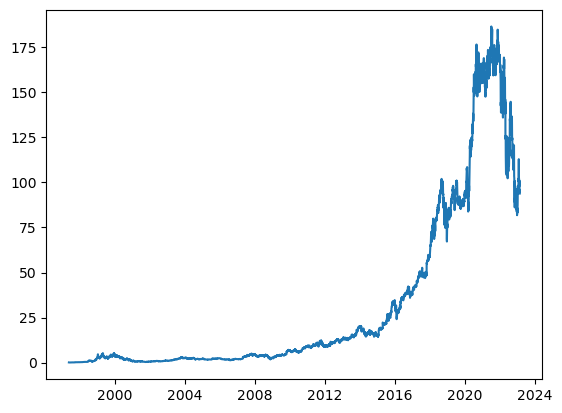

In [10]:
plt.plot(amzn.index, amzn['Adj Close']) # fig and ax object created in the background

plt.show()

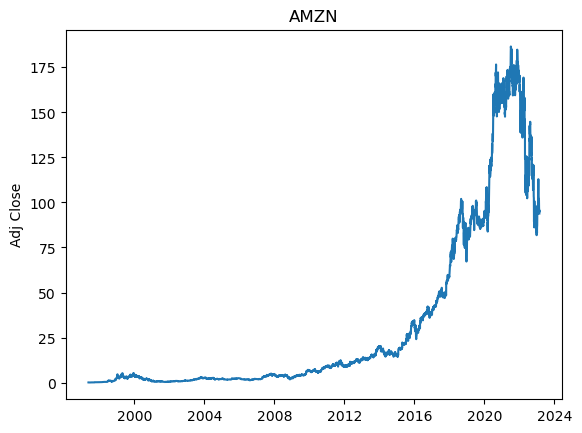

In [11]:
# using the ax object methods

fig, ax = plt.subplots() # returning fig and ax object to us

ax.plot(amzn.index, amzn['Adj Close'])
ax.set_title('AMZN')
ax.set_ylabel('Adj Close')

plt.show()


#### Line 1: Creating the figure and axes object

We first create a figure and an axes object with `fig, ax = plt.subplots()`. The axes object is the actual plot that you can see. The figure object is the region within which this plot is being displayed, which is not directly visible.

#### Line 2: Adding a line plot

With `ax.plot(amzn['Adj Close'])` we call the plot() method of the ax object to add a line plot of the Adj Close column of the amzn dataframe. The important point to understand about this step is that the line is drawn at the level of the axes object and not the figure.

#### Line 3-4: Adding a title and yaxis label

All further customization of the axes are done on the level of the axes object itself. We use `.set_title()` and `.set_ylabel()` to set a title or a ylabel.

### Task 2: Using an axes object to create a line plot

1. Create a figure and axes object using `plt.subplots()`
2. Plot the daily return rates from the Netflix stock dataset using the ax object
3. Add as a title 'NLFX' 
4. Add as a y-axis label 'Daily Return rate'.

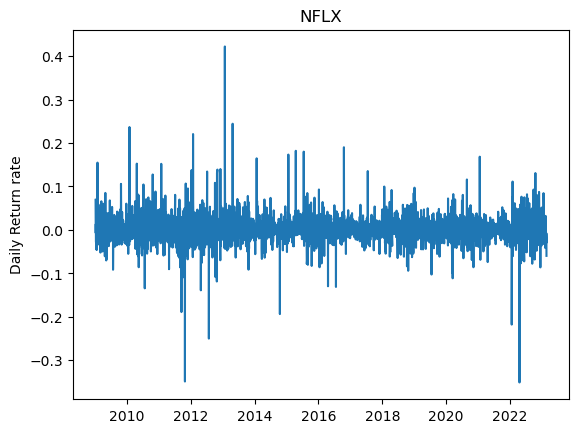

In [15]:
fig, ax = plt.subplots()

ax.plot(nflx['daily_ret'])
ax.set_title('NFLX')
ax.set_ylabel('Daily Return rate')

plt.show()

&nbsp;

## Creating subplots with plt.subplots()

&nbsp;

We can use the `plt.subplots()` function to create a figure with several subplots. In the example below we create a figure with two subplots.

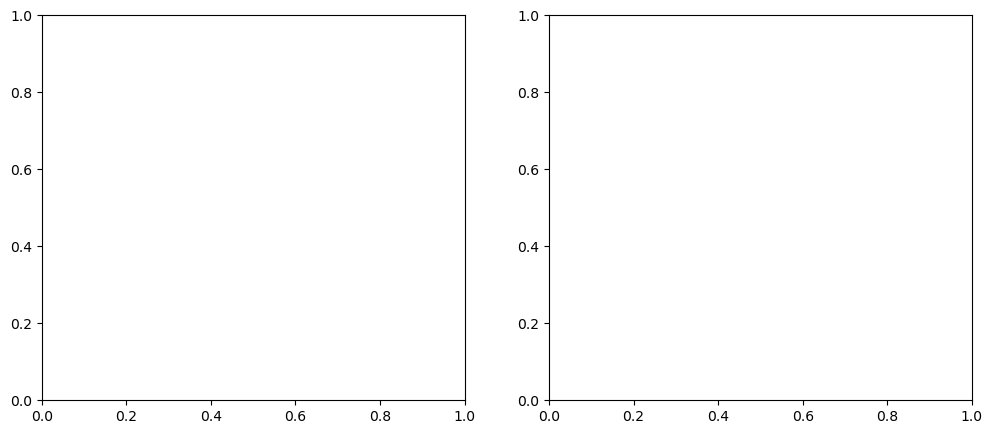

In [16]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

We set `nrows=1` and `ncols=2` to create two axes (plots) that are arranged next to each other in one row with two columns. The call to `plt.suplots()` will thus return three objects, the figure (overall chart region) and two axes (two subplots). We store the two axes under the name **ax1** and **ax2**. 

These two axes objects are returned as a numpy array with two values - one for the first and one for the second axes object. We can "unpack" the numpy array into the two separate axes objects by putting the parentheses around them as in `(ax1, ax2)`.

We set `figsize=(12,5)` to set the size of the figure to 12 inches wide and 5 inches high.


See below for an example of how to plot the daily and monthly returns from the Amazon stock dataset in the first and second subplot respectively.

Text(0, 0.5, 'Monthly Return')

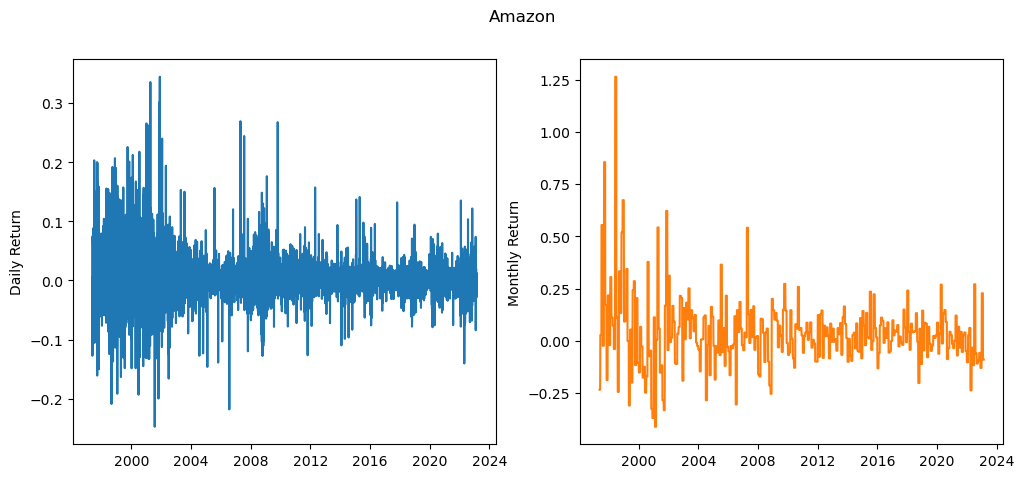

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

fig.suptitle('Amazon')

ax1.plot(amzn['daily_ret'], color='tab:blue')
ax1.set_ylabel('Daily Return')

ax2.plot(amzn['monthly_ret'], color='tab:orange')
ax2.set_ylabel('Monthly Return')

### Task 3: Creating subplots for Netflix returns

1. Create a figure with *three* subplots (axes) using the `plt.subplots()` function. 
    1. Arrange the three subplots *vertically*. 
    2. Set the figure size to 12*10 inches.
2. In the first subplot, plot the daily Netflix return rates. Use 'grey' as the color.
3. In the second subplot, plot the monthly Netflix return rates. Use 'black' as the color.
4. In the third subplot, plot the Adjusted price as a shaded area. Use 'red' as the color. You can create an area plot with `plt.fill_between()` the same way you would create a line plot with `plt.plot()`. Be aware that when working on the ax object level, you will have to replace `plt.` with the specific ax/subplot you want to plot on.
5. Add a y-axis labels to each subplot: 'Daily Return Rate', 'Monthly Return Rate', 'Adjusted'
6. Add 'Netflix' as a figure title.

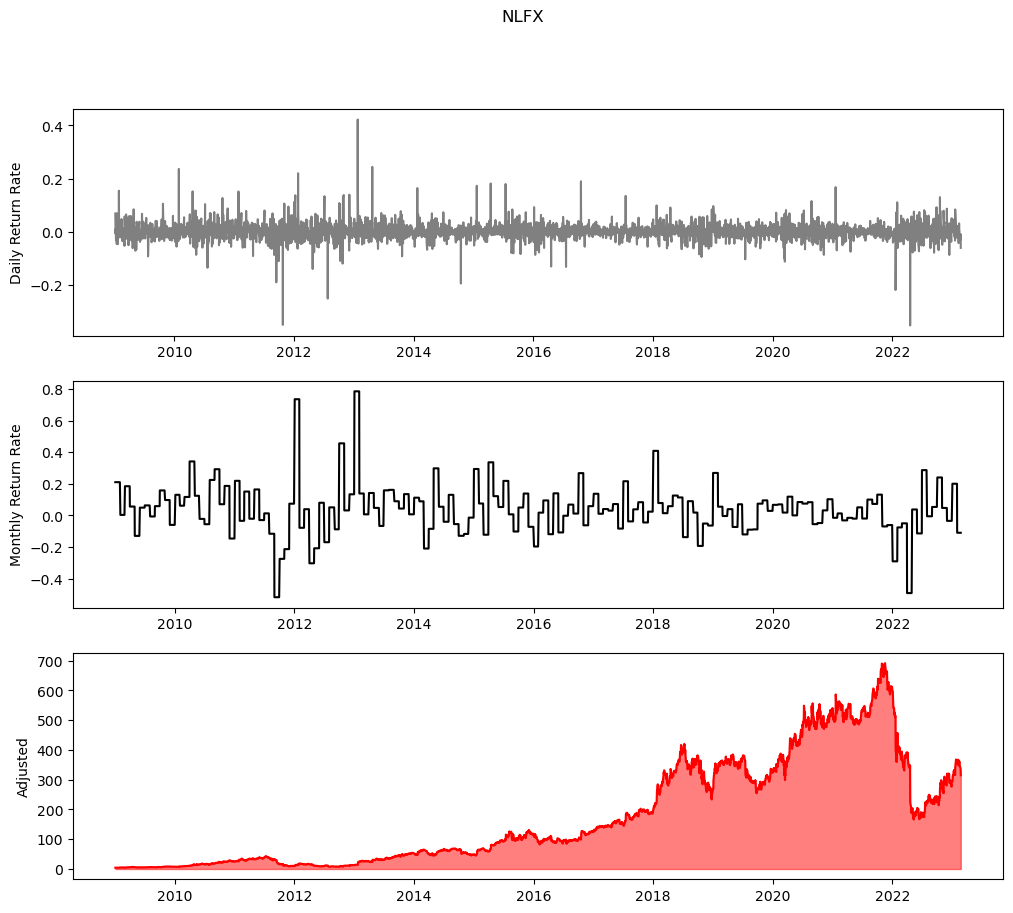

In [27]:
# Create fig and ax objects (3 subplots, vertically arranged, figsize 12*10)
fig, axs = plt.subplots(3, 1, figsize=(12, 10))


# Set fig title to 'Netflix'
fig.suptitle('NLFX')


# 1st subplot: Netflix daily returns
axs[0].plot(nflx['daily_ret'], c='grey')
axs[0].set_ylabel('Daily Return Rate')

# 2nd subplot: Netflix monthly returns
axs[1].plot(nflx['monthly_ret'], c='black')
axs[1].set_ylabel('Monthly Return Rate')

# 3rd subplot: Netflix adjusted close
axs[2].plot(nflx['Adj Close'], c='red')
axs[2].fill_between(nflx.index, nflx['Adj Close'], color='red', alpha=.5)
axs[2].set_ylabel('Adjusted')

plt.show()



### Bonus tasks

1. Add a horizontal line at the y-value 0 to each subplot. The line should be grey, dashed and have a linewidth of 1.
2. Calculate the annual return.
3. Add a fourth subplot on the annual return after the subplot on the monthly return. 
4. Add a grid to the last subplot on the adjusted price.

In [29]:
# calculate annual return rates
nflx['annual_ret'] = nflx.groupby('year')['daily_ret_1'].transform('prod') - 1

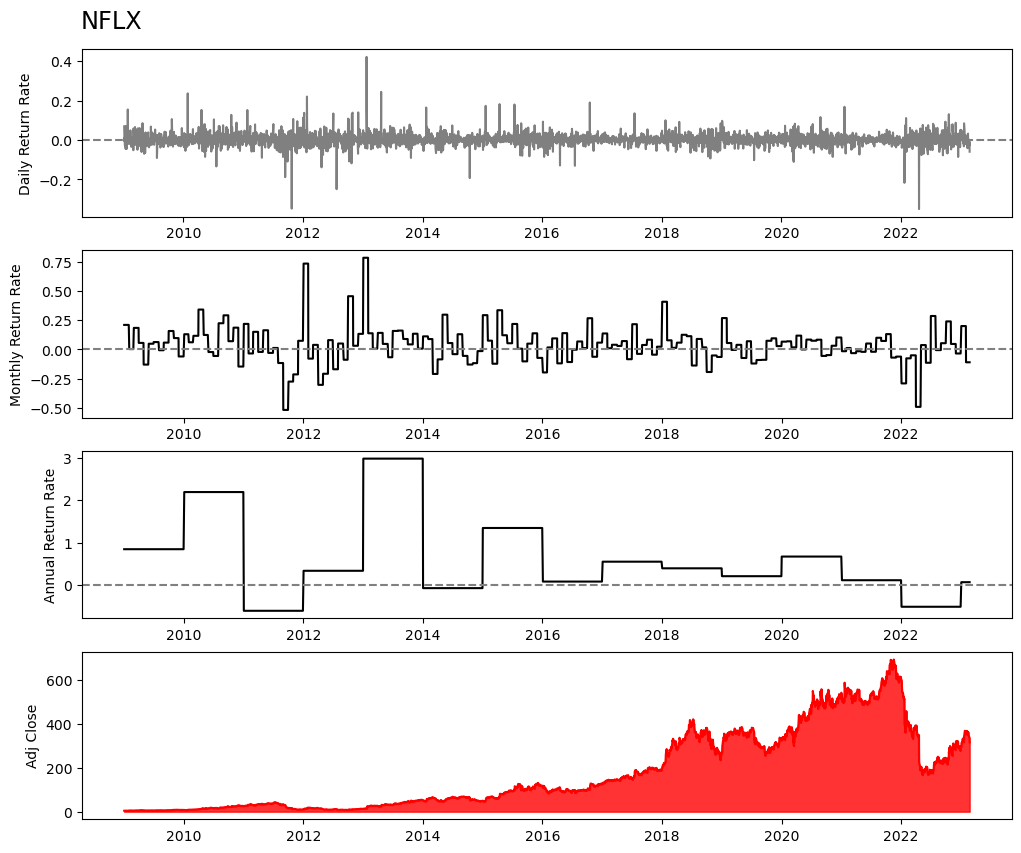

In [30]:
# Create fig and ax objects (3 subplots, vertically arranged, figsize 12*10)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))

# Set fig title to 'Netflix'
fig.suptitle('NFLX', fontsize='xx-large', y=.92, x=.15)

# 1st subplot: Netflix daily returns
ax1.plot(nflx['daily_ret'], color='grey')
ax1.set_ylabel('Daily Return Rate', fontsize='medium')
ax1.axhline(0, color='grey', linestyle='--')

# 2nd subplot: Netflix monthly returns
ax2.plot(nflx['monthly_ret'], color='black')
ax2.set_ylabel('Monthly Return Rate', fontsize='medium')
ax2.axhline(0, color='grey', linestyle='--')

# 3rd subplot: Netflix annual returns
ax3.plot(nflx['annual_ret'], color='black')
ax3.set_ylabel('Annual Return Rate', fontsize='medium')
ax3.axhline(0, color='grey', linestyle='--')

# 4th subplot: Netflix adjusted close
ax4.plot(nflx['Adj Close'], color='red')
ax4.fill_between(nflx.index, nflx['Adj Close'], color='red', alpha=.8)
ax4.set_ylabel('Adj Close', fontsize='medium')

plt.show()

<br>

<br>

<br>

<br>

<br>

<br>


### Further adjustments: Adding a title *inside* the axes

This is not part of the actual exercises. Just another way we can improve the look of the plot.

The title can be moved inside an axes object by setting the `x` and `y` parameters of the `.set_title()` method. The `loc` parameter is set to `'left'` to change the text alignment to left. When changing alignment to left, the x and y values are relative to the lower left corner of the axes. Using `x=0` and `y=0` will put the title in the lower left corner, whereas `x=0` and `y=1` will put it just above the upper left corner.

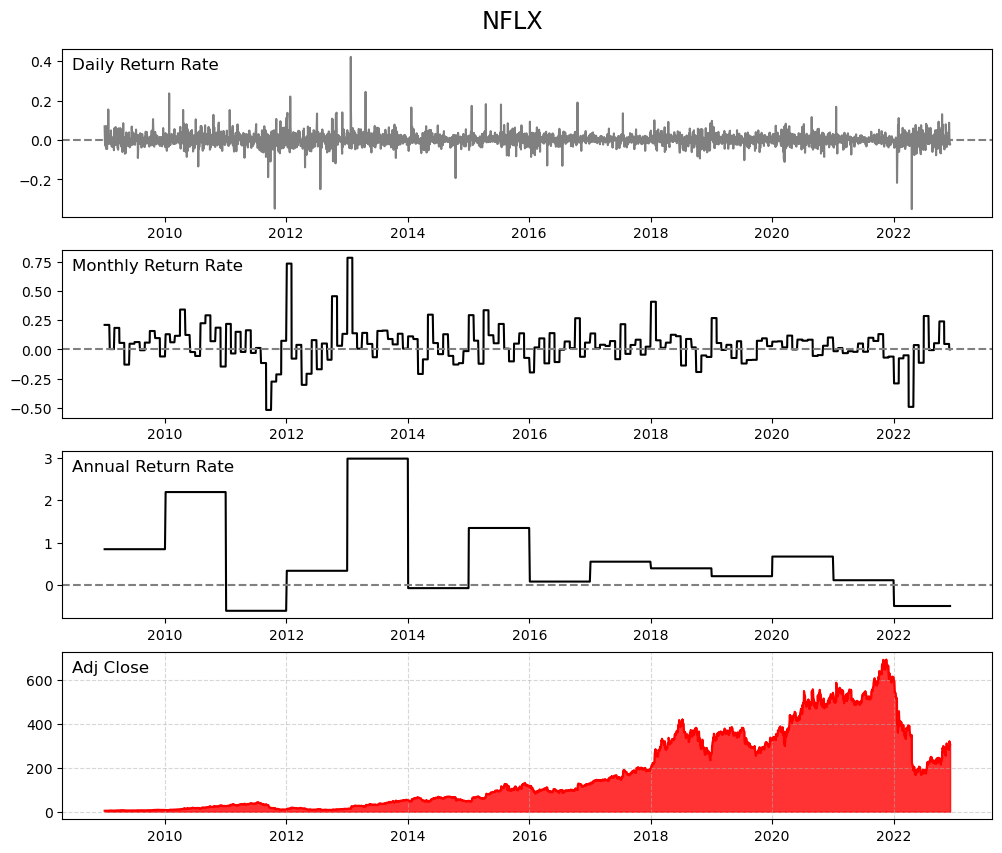

In [30]:
# Create fig and ax objects (3 subplots, vertically arranged, figsize 12*10)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10))

# Set fig title to 'Netflix'
fig.suptitle('NFLX', fontsize='xx-large', y=.92)

# 1st subplot: Netflix daily returns
ax1.plot(nflx['daily_ret'], color='grey')
ax1.set_title('Daily Return Rate', fontsize='large', loc='left', x=.01, y=.83)
ax1.axhline(0, color='grey', linestyle='--')

# 2nd subplot: Netflix monthly returns
ax2.plot(nflx['monthly_ret'], color='black')
ax2.set_title('Monthly Return Rate', fontsize='large', loc='left', x=.01, y=.83)
ax2.axhline(0, color='grey', linestyle='--')

# 3rd subplot: Netflix annual returns
ax3.plot(nflx['annual_ret'], color='black')
ax3.set_title('Annual Return Rate', fontsize='large', loc='left', x=.01, y=.83)
ax3.axhline(0, color='grey', linestyle='--')

# 4th subplot: Netflix adjusted close
ax4.plot(nflx['Adj Close'], color='red')
ax4.fill_between(nflx.index, nflx['Adj Close'], color='red', alpha=.8)
ax4.set_title('Adj Close', fontsize='large', loc='left', x=.01, y=.83)
ax4.grid(ls='--', alpha=.5)

plt.show()

<br> 

<br>

## Part 2 - Comparing Big Tech Companies

The second part of this workshop will teach you how to import income statements from yahoo finance using a function. If you would like to learn more about how the function works, you can find the code in the yfscrap.py file.

Once the income statements have been scraped from yahoo finance, we will prepare the data and then create a bar chart of the profit margins using seaborn.


<br>

## Importing income statements from yahoo finance

We want to download the income statements from the big tech companies, that is, Facebook, Apple, Amazon, Google and Microsoft from the yahoo finance website. Unfortunately, the pandas_datareader library does not provide a function to do that, which is why we had to write the code ourselves. 

The `yf_financials()` function is part of the yfscrap.py script, which is part of the files that you have received for this session. 

To make the yfscrap.py file accessible in Python, it should be located in the same folder as this jupyter notebook.

<br>

### Importing an income statements

In the example below we are using the `yf_financials()` function to import the income statement from Amazon. 

You can open the yfscrap.py file to have a look at the function. The yf_scrap_basic_syntax.py file uses a less condensed syntax to carry out the same task. 

We use **requests** to download the html code from yahoo-finance.com and **beautifulsoup** to parse the html and select the relevant information from the income statement. In the last step, pandas transforms the data into a dataframe.

In order to learn web scraping you will have to develop a basic understanding of html and css to understand how you can inspect a website to identify relevant html tags and css selectors. For more complex websites you might also have to be somewhat familiar with javascript. Let us know if you are interested to learn how to use Python to scrape websites and we can recommend you an online course and other resources.

Let us now use the `function()` to scrape an income statement from yahoo-finance.com.

See below for explanations on the code.

In [4]:
# import libraries
from yfscrap import yf_financials
import pandas as pd

# change pandas options to display all columns and change display format
pd.set_option('display.max.columns', None)

# download Amazon balance sheet
amzn_is = yf_financials('AMZN', type_='is')

amzn_is

,Comp,Total Revenue,Cost of Revenue,Gross Profit,Operating Expense,Operating Income,Net Non Operating Interest Income Expense,Other Income Expense,Pretax Income,Tax Provision,Earnings from Equity Interest Net of Tax,Net Income Common Stockholders,Diluted NI Available to Com Stockholders,Basic EPS,Diluted EPS,Basic Average Shares,Diluted Average Shares,Total Operating Income as Reported,Total Expenses,Net Income from Continuing & Discontinued Operation,Normalized Income,Interest Income,Interest Expense,Net Interest Income,EBIT,EBITDA,Reconciled Cost of Revenue,Reconciled Depreciation,Net Income from Continuing Operation Net Minority Interest,Total Unusual Items Excluding Goodwill,Total Unusual Items,Normalized EBITDA,Tax Rate for Calcs,Tax Effect of Unusual Items
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ttm,AMZN,513983000.0,446343000.0,67640000.0,55392000.0,12248000.0,-1378000.0,-16806000.0,-5936000.0,-3217000.0,-3000.0,-2722000.0,-2722000.0,NaN,NaN,10120000.0,10300000.0,12248000.0,501735000.0,-2722000.0,7037600.0,989000.0,2367000.0,-1378000.0,-3569000.0,38352000.0,446343000.0,41921000.0,-2722000.0,-16266000.0,-16266000.0,54618000.0,0.0,-6506400.0
12/31/2022,AMZN,513983000.0,446343000.0,67640000.0,55392000.0,12248000.0,-1378000.0,-16806000.0,-5936000.0,-3217000.0,-3000.0,-2722000.0,-2722000.0,NaN,NaN,10000000.0,10200000.0,12248000.0,501735000.0,-2722000.0,7037600.0,989000.0,2367000.0,-1378000.0,-3569000.0,NaN,446343000.0,41921000.0,-2722000.0,-16266000.0,-16266000.0,54618000.0,0.0,-6506400.0
12/31/2021,AMZN,469822000.0,403507000.0,66315000.0,41436000.0,24879000.0,-1361000.0,14633000.0,38151000.0,4791000.0,4000.0,33364000.0,33364000.0,NaN,NaN,9880000.0,10080000.0,24879000.0,444943000.0,33364000.0,20551997.0,448000.0,1809000.0,-1361000.0,39960000.0,NaN,403507000.0,34296000.0,33364000.0,14652000.0,14652000.0,59604000.0,0.0,1839997.0
12/31/2020,AMZN,386064000.0,334564000.0,51500000.0,28601000.0,22899000.0,-1092000.0,2371000.0,24178000.0,2863000.0,16000.0,21331000.0,21331000.0,NaN,NaN,NaN,NaN,22899000.0,363165000.0,21331000.0,21331000.0,555000.0,1647000.0,-1092000.0,25825000.0,NaN,334564000.0,25251000.0,21331000.0,203000.0,203000.0,51076000.0,0.0,0.0
12/31/2019,AMZN,280522000.0,241699000.0,38823000.0,24282000.0,14541000.0,-768000.0,203000.0,13976000.0,2374000.0,-14000.0,11588000.0,11588000.0,NaN,NaN,NaN,NaN,14541000.0,265981000.0,11588000.0,11588000.0,832000.0,1600000.0,-768000.0,15576000.0,NaN,241699000.0,21789000.0,11588000.0,NaN,NaN,37365000.0,0.0,0.0


#### Line 2f: Importing libraries


```python
from yfscrap import yf_financials
import pandas as pd
```
We import the function `yf_financials()` from the local module `yfscrap`, which is located in the same folder as this jupyter notebook. We also import pandass ince we will use it later on to transform.

<br>

#### Line 6: Changing the pandas display options

```python
pd.set_option('display.max.columns', None)
```
The income statement has many columns. To always display all columns from a dataframe we set the max columns option to None.

<br>

#### Line 9: Downloading the income statement


```python
amzn_is = yf_financials('AMZN', type_='is')
```
The `yf_financials()` function takes two arguments - the ticker of the stock and the type of document to download (balance sheet or income statment). We pass `'is'` as the argument for `type_` to download the income statement.

&nbsp;

&nbsp;

### Combining income statements with pd.concat()

Since we want to download income statements from more than one company, it would be ideal if we could combine all income statements into a dataframe.

We can easily combine them with the `pd.concat()` function. See the example below on how to combine two income statements. 

In [5]:
# download income statement for Amazon
amzn_is = yf_financials('AMZN', type_='is')

# download income statement for Microsoft
msft_is = yf_financials('MSFT', type_='is')

# append amzn_is to msft_is
income_statements = pd.concat([amzn_is, msft_is])

income_statements

,Comp,Total Revenue,Cost of Revenue,Gross Profit,Operating Expense,Operating Income,Net Non Operating Interest Income Expense,Other Income Expense,Pretax Income,Tax Provision,Earnings from Equity Interest Net of Tax,Net Income Common Stockholders,Diluted NI Available to Com Stockholders,Basic EPS,Diluted EPS,Basic Average Shares,Diluted Average Shares,Total Operating Income as Reported,Total Expenses,Net Income from Continuing & Discontinued Operation,Normalized Income,Interest Income,Interest Expense,Net Interest Income,EBIT,EBITDA,Reconciled Cost of Revenue,Reconciled Depreciation,Net Income from Continuing Operation Net Minority Interest,Total Unusual Items Excluding Goodwill,Total Unusual Items,Normalized EBITDA,Tax Rate for Calcs,Tax Effect of Unusual Items
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ttm,AMZN,513983000.0,446343000.0,67640000.0,55392000.0,12248000.0,-1378000.0,-16806000.0,-5936000.0,-3217000.0,-3000.0,-2722000.0,-2722000.0,NaN,NaN,10120000.0,10300000.0,12248000.0,501735000.0,-2722000.0,7037600.0,989000.0,2367000.0,-1378000.0,-3569000.0,38352000.0,446343000.0,41921000.0,-2722000.0,-16266000.0,-16266000.0,54618000.0,0.0,-6506400.0
12/31/2022,AMZN,513983000.0,446343000.0,67640000.0,55392000.0,12248000.0,-1378000.0,-16806000.0,-5936000.0,-3217000.0,-3000.0,-2722000.0,-2722000.0,NaN,NaN,10000000.0,10200000.0,12248000.0,501735000.0,-2722000.0,7037600.0,989000.0,2367000.0,-1378000.0,-3569000.0,NaN,446343000.0,41921000.0,-2722000.0,-16266000.0,-16266000.0,54618000.0,0.0,-6506400.0
12/31/2021,AMZN,469822000.0,403507000.0,66315000.0,41436000.0,24879000.0,-1361000.0,14633000.0,38151000.0,4791000.0,4000.0,33364000.0,33364000.0,NaN,NaN,9880000.0,10080000.0,24879000.0,444943000.0,33364000.0,20551997.0,448000.0,1809000.0,-1361000.0,39960000.0,NaN,403507000.0,34296000.0,33364000.0,14652000.0,14652000.0,59604000.0,0.0,1839997.0
12/31/2020,AMZN,386064000.0,334564000.0,51500000.0,28601000.0,22899000.0,-1092000.0,2371000.0,24178000.0,2863000.0,16000.0,21331000.0,21331000.0,NaN,NaN,NaN,NaN,22899000.0,363165000.0,21331000.0,21331000.0,555000.0,1647000.0,-1092000.0,25825000.0,NaN,334564000.0,25251000.0,21331000.0,203000.0,203000.0,51076000.0,0.0,0.0
12/31/2019,AMZN,280522000.0,241699000.0,38823000.0,24282000.0,14541000.0,-768000.0,203000.0,13976000.0,2374000.0,-14000.0,11588000.0,11588000.0,NaN,NaN,NaN,NaN,14541000.0,265981000.0,11588000.0,11588000.0,832000.0,1600000.0,-768000.0,15576000.0,NaN,241699000.0,21789000.0,11588000.0,NaN,NaN,37365000.0,0.0,0.0
ttm,MSFT,204094000.0,64984000.0,139110000.0,56295000.0,82815000.0,423000.0,-650000.0,82588000.0,15139000.0,NaN,67449000.0,67449000.0,NaN,NaN,7496000.0,7540000.0,82815000.0,121279000.0,67449000.0,67895731.0,2412000.0,1989000.0,423000.0,84577000.0,98767000.0,64984000.0,14190000.0,67449000.0,-547000.0,-547000.0,99314000.0,0.0,-100269.0
6/30/2022,MSFT,198270000.0,62650000.0,135620000.0,52237000.0,83383000.0,31000.0,302000.0,83716000.0,10978000.0,NaN,72738000.0,72738000.0,NaN,NaN,7547000.0,7608000.0,83383000.0,114887000.0,72738000.0,72447420.0,2094000.0,2063000.0,31000.0,85779000.0,NaN,62650000.0,14460000.0,72738000.0,334000.0,334000.0,99905000.0,0.0,43420.0
6/30/2021,MSFT,168088000.0,52232000.0,115856000.0,45940000.0,69916000.0,-215000.0,1401000.0,71102000.0,9831000.0,NaN,61271000.0,61271000.0,NaN,NaN,7610000.0,7683000.0,69916000.0,98172000.0,61271000.0,60150420.0,2131000.0,2346000.0,-215000.0,73448000.0,NaN,52232000.0,11686000.0,61271000.0,1303000.0,1303000.0,83831000.0,0.0,182420.0
6/30/2020,MSFT,143015000.0,46078000.0,96937000.0,43978000.0,52959000.0,89000.0,-12000.0,53036000.0,8755000.0,NaN,44281000.0,44281000.0,NaN,NaN,7673000.0,7753000.0,52959000.0,90056000.0,44281000.0,44257620.0,2680000.0,2591000.0,89000.0,55627000.0,NaN,46078000.0,12796000.0,44281000.0,28000.0,28000.0,68395000.0,0.0,4620.0


&nbsp;

### Task 1: Download and combine income statements

1. Import pandas and the yf_financials function from yfscrap.
2. Download the income statement from Amazon.
3. Download the income statement from Apple. You can look up the stock symbols/tickers from the `tickers` list.
4. Combine the Apple and  the Amazon income statement and name the combined data `income_statement`
5. Continue in that same way and download the income statements from the remaining companies and append each one to the `income_statement` dataframe.


In [6]:
# import yf_financials
import pandas as pd
from yfscrap import yf_financials 


# download income statements
tickers = ['AMZN', 'AAPL', 'META', 'MSFT', 'GOOG']

amzn_is = yf_financials('AMZN', 'is')
aapl_is = yf_financials('AAPL', 'is')
meta_is = yf_financials('META', 'is')
msft_is = yf_financials('MSFT', 'is')
goog_is = yf_financials('GOOG', 'is')

# combine income_statements with append or pd.concat
income_statements = pd.concat([amzn_is, aapl_is, meta_is, msft_is, goog_is])


#### Bonus task: Using a for loop

Use a for loop to download and combine he income statements using the `tickers` list.

In [7]:
tickers = ['AMZN', 'AAPL', 'META', 'MSFT', 'GOOG']

income_statements = yf_financials(tickers[0], type_='is')

for ticker in tickers[1:]:
    _is = yf_financials(ticker, type_='is')
    income_statements = pd.concat([income_statements, _is])

display(income_statements)


,Comp,Total Revenue,Cost of Revenue,Gross Profit,Operating Expense,Operating Income,Net Non Operating Interest Income Expense,Other Income Expense,Pretax Income,Tax Provision,Earnings from Equity Interest Net of Tax,Net Income Common Stockholders,Diluted NI Available to Com Stockholders,Basic EPS,Diluted EPS,Basic Average Shares,Diluted Average Shares,Total Operating Income as Reported,Total Expenses,Net Income from Continuing & Discontinued Operation,Normalized Income,Interest Income,Interest Expense,Net Interest Income,EBIT,EBITDA,Reconciled Cost of Revenue,Reconciled Depreciation,Net Income from Continuing Operation Net Minority Interest,Total Unusual Items Excluding Goodwill,Total Unusual Items,Normalized EBITDA,Tax Rate for Calcs,Tax Effect of Unusual Items,Average Dilution Earnings
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ttm,AMZN,513983000.0,446343000.0,67640000.0,55392000.0,12248000.0,-1378000.0,-16806000.0,-5936000.0,-3217000.0,-3000.0,-2722000.0,-2722000.0,NaN,NaN,10120000.0,10300000.0,12248000.0,501735000.0,-2722000.0,7037600.0,989000.0,2367000.0,-1378000.0,-3569000.0,38352000.0,446343000.0,41921000.0,-2722000.0,-16266000.0,-16266000.0,54618000.0,0.0,-6506400.0,NaN
12/31/2022,AMZN,513983000.0,446343000.0,67640000.0,55392000.0,12248000.0,-1378000.0,-16806000.0,-5936000.0,-3217000.0,-3000.0,-2722000.0,-2722000.0,NaN,NaN,10000000.0,10200000.0,12248000.0,501735000.0,-2722000.0,7037600.0,989000.0,2367000.0,-1378000.0,-3569000.0,NaN,446343000.0,41921000.0,-2722000.0,-16266000.0,-16266000.0,54618000.0,0.0,-6506400.0,NaN
12/31/2021,AMZN,469822000.0,403507000.0,66315000.0,41436000.0,24879000.0,-1361000.0,14633000.0,38151000.0,4791000.0,4000.0,33364000.0,33364000.0,NaN,NaN,9880000.0,10080000.0,24879000.0,444943000.0,33364000.0,20551997.0,448000.0,1809000.0,-1361000.0,39960000.0,NaN,403507000.0,34296000.0,33364000.0,14652000.0,14652000.0,59604000.0,0.0,1839997.0,NaN
12/31/2020,AMZN,386064000.0,334564000.0,51500000.0,28601000.0,22899000.0,-1092000.0,2371000.0,24178000.0,2863000.0,16000.0,21331000.0,21331000.0,NaN,NaN,NaN,NaN,22899000.0,363165000.0,21331000.0,21331000.0,555000.0,1647000.0,-1092000.0,25825000.0,NaN,334564000.0,25251000.0,21331000.0,203000.0,203000.0,51076000.0,0.0,0.0,NaN
12/31/2019,AMZN,280522000.0,241699000.0,38823000.0,24282000.0,14541000.0,-768000.0,203000.0,13976000.0,2374000.0,-14000.0,11588000.0,11588000.0,NaN,NaN,NaN,NaN,14541000.0,265981000.0,11588000.0,11588000.0,832000.0,1600000.0,-768000.0,15576000.0,NaN,241699000.0,21789000.0,11588000.0,NaN,NaN,37365000.0,0.0,0.0,NaN
ttm,AAPL,387537000.0,220666000.0,166871000.0,52906000.0,113965000.0,-197000.0,-283000.0,113485000.0,18314000.0,NaN,95171000.0,95171000.0,NaN,NaN,16215963.0,16325819.0,113965000.0,273572000.0,95171000.0,95171000.0,3043000.0,3240000.0,-197000.0,116725000.0,128048000.0,220666000.0,11323000.0,95171000.0,NaN,NaN,128048000.0,0.0,0.0,NaN
9/30/2022,AAPL,394328000.0,223546000.0,170782000.0,51345000.0,119437000.0,-106000.0,-228000.0,119103000.0,19300000.0,NaN,99803000.0,99803000.0,NaN,NaN,16701272.0,16864919.0,119437000.0,274891000.0,99803000.0,99803000.0,2825000.0,2931000.0,-106000.0,122034000.0,NaN,223546000.0,11104000.0,99803000.0,NaN,NaN,133138000.0,0.0,0.0,NaN
9/30/2021,AAPL,365817000.0,212981000.0,152836000.0,43887000.0,108949000.0,198000.0,60000.0,109207000.0,14527000.0,NaN,94680000.0,94680000.0,NaN,NaN,17352119.0,17528214.0,108949000.0,256868000.0,94680000.0,94680000.0,2843000.0,2645000.0,198000.0,111852000.0,NaN,212981000.0,11284000.0,94680000.0,NaN,NaN,123136000.0,0.0,0.0,NaN
9/30/2020,AAPL,274515000.0,169559000.0,104956000.0,38668000.0,66288000.0,890000.0,-87000.0,67091000.0,9680000.0,NaN,57411000.0,57411000.0,NaN,NaN,18471336.0,18595652.0,66288000.0,208227000.0,57411000.0,57411000.0,3763000.0,2873000.0,890000.0,69964000.0,NaN,169559000.0,11056000.0,57411000.0,NaN,NaN,81020000.0,0.0,0.0,NaN


&nbsp;

### Task 2: Calculating gross profit margin and operating margin

1. Create a new column in the income_statements dataset to calculate the Gross Profit Margin

     $ Gross \ Profit \ Margin = \frac{Gross \ Profit}{Total \ Revenue} \cdot 100$

<br>

2. Create another new column in the income_statements dataset to cacluate the operating margin: EBIT divided by total revenue x 100

     $ Operating \ Margin = \frac{EBIT}{Total \ Revenue} \cdot 100$

&nbsp;

In [8]:
income_statements['gross_profit_margin'] = income_statements['Gross Profit'] / income_statements['Total Revenue'] * 100
income_statements['operating_margin'] = income_statements['EBIT'] / income_statements['Total Revenue'] * 100

&nbsp;

## Plotting with seaborn

In the next step, we will create a bar plot showing the gross profit and operating margin for each company. We will use the seaborn library for this plot. The seaborn library is based on matplotlib. In comparison to matplotlib, it is often a lot easier to create a nice looking plot with seaborn. Matplotlib, however, offers you more options to create highly customized plots.

### Barplot with seaborn

To demonstrate how to create a barplot with seaborn, we will use the titanic dataset to plot how passenger class and sex affect survival rates. Below we first load the titanic dataset with `sns.load_dataset('titanic')`.

The first three columns code for whether a passenger survived (0: no, 1: yes), the passenger class (1, 2, 3) and the sex (male, female).

In [9]:
import seaborn as sns

titanic = sns.load_dataset('titanic')

titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### A simple bar plot

We will now plot the survival rates based on the **survived** column as a function of the passenger class, which is stored in the **pclass** column. We want to plot the passenger class on the x-axis and the Survival rate on the y-axis.

To do so, we use the `catplot()` function to plot the average of the values in the survived column, i.e. the surival rate, for each passenger class. [The `catplot()` function can be used to draw a number of categorical plots:  strip, swarm, box, violin, boxen, point, bar, or count](https://seaborn.pydata.org/tutorial/categorical.html).

We pass as arguments:
1. `x='pclass'`: To plot the categorical variable **pclass** on the x-axis
2. `y='survived'`: To plot the mean of the column **survived** on the y-axis
3. `kind='bar'`: To draw a barplot.
4. `data=titanic`: The dataset to be used.

We assign the created plot object to the variable **g**, so that we can call the plot object to modify it later on.

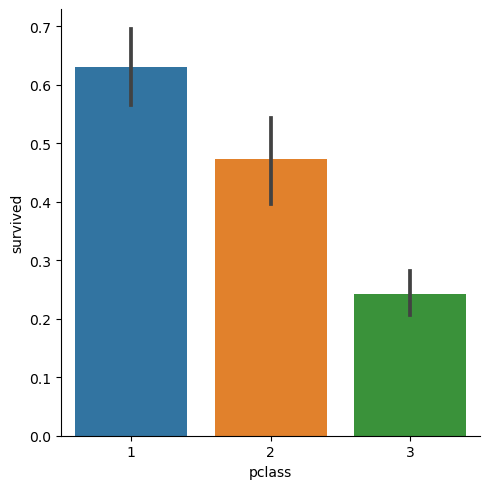

In [10]:
g = sns.catplot(x='pclass', y='survived', kind='bar', data=titanic, estimator='mean')


### Task 3: Grouped bar plot with seaborn

1. Import seaborn under the alias sns.
2. Load the titanic dataset.
3. Display the head of the titanic dataset.
4. Create a barplot using seaborn plotting pclass on the x-axis and the survival rate on the y-axis.
5. Search online how to create a grouped barplot as in the example below.

<img src="https://www.dropbox.com/s/y09ppna65v8yaqd/titanic_bar.png?dl=1">

In [11]:
import seaborn as sns

titanic = sns.load_dataset("titanic")

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


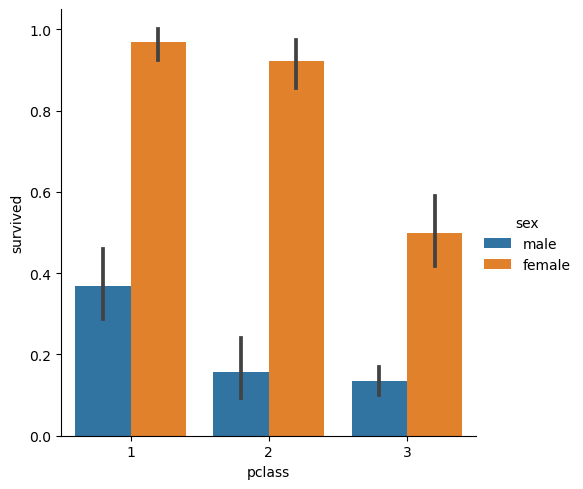

In [12]:
sns.catplot(
    data=titanic,
    x='pclass',
    y='survived',
    hue='sex',
    kind='bar'
)

&nbsp;

&nbsp;

### Creating a margin plot with seaborn

Before we can plot the data, we have to prepare it so that we can create a grouped barplot.

In [13]:
income_statements

,Comp,Total Revenue,Cost of Revenue,Gross Profit,Operating Expense,Operating Income,Net Non Operating Interest Income Expense,Other Income Expense,Pretax Income,Tax Provision,Earnings from Equity Interest Net of Tax,Net Income Common Stockholders,Diluted NI Available to Com Stockholders,Basic EPS,Diluted EPS,Basic Average Shares,Diluted Average Shares,Total Operating Income as Reported,Total Expenses,Net Income from Continuing & Discontinued Operation,Normalized Income,Interest Income,Interest Expense,Net Interest Income,EBIT,EBITDA,Reconciled Cost of Revenue,Reconciled Depreciation,Net Income from Continuing Operation Net Minority Interest,Total Unusual Items Excluding Goodwill,Total Unusual Items,Normalized EBITDA,Tax Rate for Calcs,Tax Effect of Unusual Items,Average Dilution Earnings,gross_profit_margin,operating_margin
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ttm,AMZN,513983000.0,446343000.0,67640000.0,55392000.0,12248000.0,-1378000.0,-16806000.0,-5936000.0,-3217000.0,-3000.0,-2722000.0,-2722000.0,NaN,NaN,10120000.0,10300000.0,12248000.0,501735000.0,-2722000.0,7037600.0,989000.0,2367000.0,-1378000.0,-3569000.0,38352000.0,446343000.0,41921000.0,-2722000.0,-16266000.0,-16266000.0,54618000.0,0.0,-6506400.0,NaN,13.159968,-0.694381
12/31/2022,AMZN,513983000.0,446343000.0,67640000.0,55392000.0,12248000.0,-1378000.0,-16806000.0,-5936000.0,-3217000.0,-3000.0,-2722000.0,-2722000.0,NaN,NaN,10000000.0,10200000.0,12248000.0,501735000.0,-2722000.0,7037600.0,989000.0,2367000.0,-1378000.0,-3569000.0,NaN,446343000.0,41921000.0,-2722000.0,-16266000.0,-16266000.0,54618000.0,0.0,-6506400.0,NaN,13.159968,-0.694381
12/31/2021,AMZN,469822000.0,403507000.0,66315000.0,41436000.0,24879000.0,-1361000.0,14633000.0,38151000.0,4791000.0,4000.0,33364000.0,33364000.0,NaN,NaN,9880000.0,10080000.0,24879000.0,444943000.0,33364000.0,20551997.0,448000.0,1809000.0,-1361000.0,39960000.0,NaN,403507000.0,34296000.0,33364000.0,14652000.0,14652000.0,59604000.0,0.0,1839997.0,NaN,14.114920,8.505349
12/31/2020,AMZN,386064000.0,334564000.0,51500000.0,28601000.0,22899000.0,-1092000.0,2371000.0,24178000.0,2863000.0,16000.0,21331000.0,21331000.0,NaN,NaN,NaN,NaN,22899000.0,363165000.0,21331000.0,21331000.0,555000.0,1647000.0,-1092000.0,25825000.0,NaN,334564000.0,25251000.0,21331000.0,203000.0,203000.0,51076000.0,0.0,0.0,NaN,13.339757,6.689305
12/31/2019,AMZN,280522000.0,241699000.0,38823000.0,24282000.0,14541000.0,-768000.0,203000.0,13976000.0,2374000.0,-14000.0,11588000.0,11588000.0,NaN,NaN,NaN,NaN,14541000.0,265981000.0,11588000.0,11588000.0,832000.0,1600000.0,-768000.0,15576000.0,NaN,241699000.0,21789000.0,11588000.0,NaN,NaN,37365000.0,0.0,0.0,NaN,13.839556,5.552506
ttm,AAPL,387537000.0,220666000.0,166871000.0,52906000.0,113965000.0,-197000.0,-283000.0,113485000.0,18314000.0,NaN,95171000.0,95171000.0,NaN,NaN,16215963.0,16325819.0,113965000.0,273572000.0,95171000.0,95171000.0,3043000.0,3240000.0,-197000.0,116725000.0,128048000.0,220666000.0,11323000.0,95171000.0,NaN,NaN,128048000.0,0.0,0.0,NaN,43.059372,30.119705
9/30/2022,AAPL,394328000.0,223546000.0,170782000.0,51345000.0,119437000.0,-106000.0,-228000.0,119103000.0,19300000.0,NaN,99803000.0,99803000.0,NaN,NaN,16701272.0,16864919.0,119437000.0,274891000.0,99803000.0,99803000.0,2825000.0,2931000.0,-106000.0,122034000.0,NaN,223546000.0,11104000.0,99803000.0,NaN,NaN,133138000.0,0.0,0.0,NaN,43.309631,30.947333
9/30/2021,AAPL,365817000.0,212981000.0,152836000.0,43887000.0,108949000.0,198000.0,60000.0,109207000.0,14527000.0,NaN,94680000.0,94680000.0,NaN,NaN,17352119.0,17528214.0,108949000.0,256868000.0,94680000.0,94680000.0,2843000.0,2645000.0,198000.0,111852000.0,NaN,212981000.0,11284000.0,94680000.0,NaN,NaN,123136000.0,0.0,0.0,NaN,41.779360,30.575944
9/30/2020,AAPL,274515000.0,169559000.0,104956000.0,38668000.0,66288000.0,890000.0,-87000.0,67091000.0,9680000.0,NaN,57411000.0,57411000.0,NaN,NaN,18471336.0,18595652.0,66288000.0,208227000.0,57411000.0,57411000.0,3763000.0,2873000.0,890000.0,69964000.0,NaN,169559000.0,110560

### Preparing the data

In the first step we will select the data from 2019 by using the .loc property to only select the values from 2020. The companies use slightly different times to release their annual reports, which is why we first set up a **mask** variable to return a list of True and False values for when the date in the index column is either `'12/31/2021', '9/30/2021', '6/30/2021'`. 

To create the **mask** variable, we use the `.isin()` method, which tests whether a value in the index is equal to one of the values in the list `['12/31/2021', '9/30/2021', '6/30/2021']`.

We then apply the **mask** with the .loc property and also select the columns for the company, the gross profit margin and the operating margin with the **columns** list.

In [14]:
# selecting data from 2019
columns = ['Comp', 'gross_profit_margin', 'operating_margin']
mask = income_statements.index.isin(['12/31/2021', '9/30/2021', '6/30/2021']) 

margins = income_statements.loc[mask, columns]
margins

,Comp,gross_profit_margin,operating_margin
Date,,,
12/31/2021,AMZN,14.114920,8.505349
9/30/2021,AAPL,41.779360,30.575944
12/31/2021,META,80.794376,39.645041
6/30/2021,MSFT,68.925801,43.696159
12/31/2021,GOOG,56.939803,35.352065


In order to create a grouped bar plot which plots two bars, one for the gross profit margin and one for the operating margin, for each company, we have to *reshape* the dataset. 

We can use the `pd.melt()` function to combine the values from the columns **gross_profit_margin** and **operating_margin** into a single column. It will also add a new categorical variable to the dataset that uses the column names **gross_profit_margin** and **operating_margin** to indicate what the values represent.

The `pd.melt()` function takes as arguments:
1. `margins`: The dataframe that should be reshaped as the first argument.
2. `id_vars='Comp'`: The column that identifies a unique observation, which is the **Comp** column. We pass the **Comp** column as the identifier, so that those values are excluded from the column that combines the margin values.
3. `value_vars`: The columns that we want to move from wide to long, which are **gross_profit_margin** and **operating_margin**. In principle, not necessary to specify the variables since these are all remaining variables.
3. `var_name='margin_type'`: The name to be used for the new categorical variable.
4. `value_name='margin_value'`: The name to be used for the column that combines the values.


In [15]:
# reshaping the dataset to combine the margin values into a single column
margins_long = pd.melt(margins, id_vars='Comp',
                                value_vars=['gross_profit_margin', 'operating_margin'],
                                var_name='margin_type', 
                                value_name='margin_value'
                                )
margins_long

,Comp,margin_type,margin_value
0,AMZN,gross_profit_margin,14.114920
1,AAPL,gross_profit_margin,41.779360
2,META,gross_profit_margin,80.794376
3,MSFT,gross_profit_margin,68.925801
4,GOOG,gross_profit_margin,56.939803
5,AMZN,operating_margin,8.505349
6,AAPL,operating_margin,30.575944
7,META,operating_margin,39.645041
8,MSFT,operating_margin,43.696159
9,GOOG,operating_margin,35.352065


&nbsp;

### Task 4: Margin Plot

Now it is your turn to use the reshaped dataset to create a barplot of the margin values with seaborn. 

Plot the company names on the x-axis and the margin value on the y-axis. Plot the gross profit margin and operating margin in different colours.

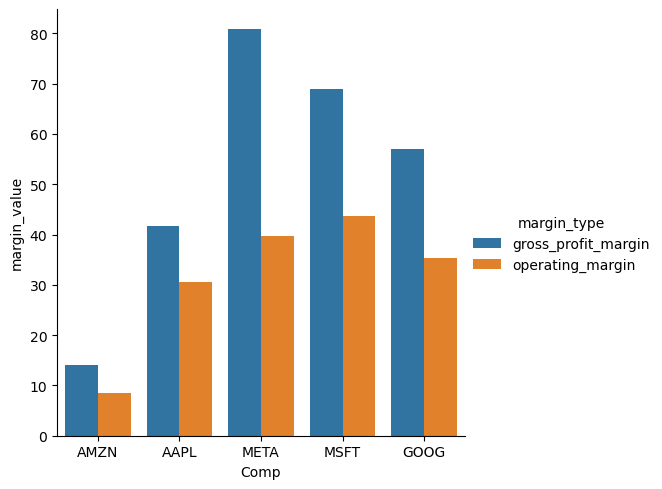

In [16]:
sns.catplot(
    data=margins_long, 
    x='Comp', 
    y='margin_value', 
    hue='margin_type', 
    kind='bar'
    )

### Customizing a seaborn catplot

We are now going to customize the barplot by changing the plot title, axis and legend labels and the overall visual appearance by applying a theme.

- `sns.set_style('whitegrid')` sets the theme to whitegrid. There are five themes available: darkgrid, whitegrid, dark, white, and ticks
- `g.set()` can be used to set the title, axis labels, axis ticks and limits
- `g._legend.set_title()` sets the legend title
- `g._legend.texts[i].` to set a text value for the i-th label

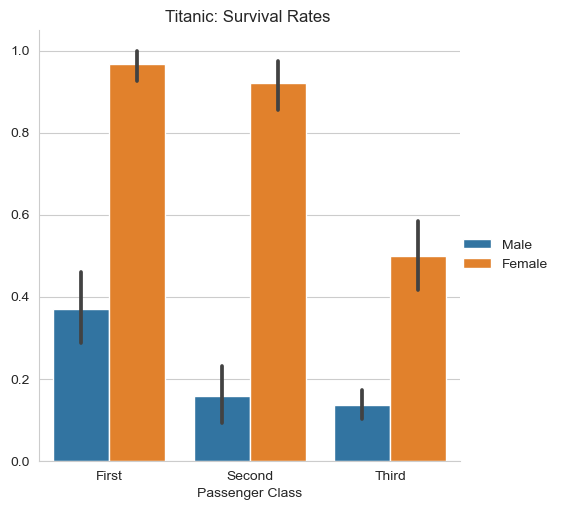

In [17]:
sns.set_style('whitegrid')

g = sns.catplot(x='class', y='survived', hue='sex', kind='bar', data=titanic)

g.set(title='Titanic: Survival Rates ', xlabel='Passenger Class', ylabel='')

g._legend.set_title('')
g._legend.texts[0].set_text('Male')
g._legend.texts[1].set_text('Female')

### Task 5: Customizing the margin plot

1. Set the title to 'Big Tech: Margins'
2. Remove the x axis label
3. Set the y axis label to Percent
4. Remove the legend title
5. Set the legend labels to 'Gross Profit Margin' and 'Operating Margin'

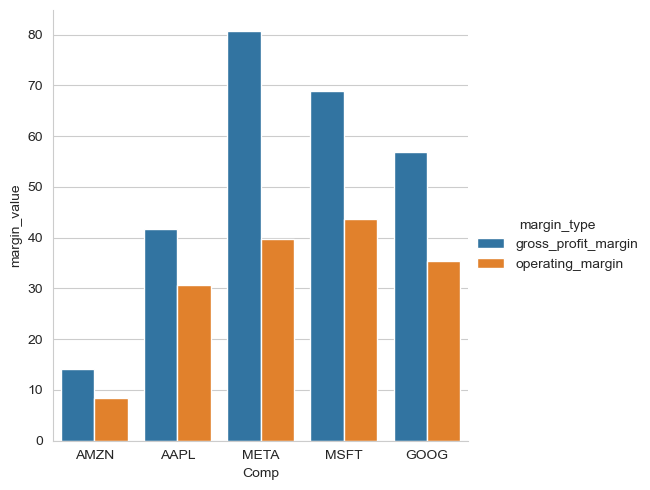

In [19]:
sns.set_style('whitegrid')

sns.catplot(
    data=margins_long, 
    x='Comp', 
    y='margin_value', 
    hue='margin_type', 
    kind='bar'
    )

g.set(title='Big Tech: Margins ', xlabel='', ylabel='Percent')
g._legend.set_title('')
g._legend.texts[0].set_text('Gross Profit Margin')
g._legend.texts[1].set_text('Operating Margin')

<div  class="alert alert-block alert-info" style="color:#1b1b1b; background-color:#f2f2f2; border: 0px; -moz-border-radius: 10px; -webkit-border-radius: 10px;padding:50px; width:90%">

### Please give us your feedback!

This is the first time that we are delivering our trainings online. In order to adapt our training to your needs and provide the most valuable learning experience for you, we depend on your feedack.

We would be grateful if you could take **1 min** before the end of the workshop to get your feedback!

[Click here to open the survey!](<https://lse.eu.qualtrics.com/jfe/form/SV_ewXuHQ1nRnurTdY?coursename=Python for Accounting 3&topic=Python&link=https://lsecloud-my.sharepoint.com/:u:/g/personal/m_wiemers_lse_ac_uk/ERcYXh1iGR9OhH_8hIKwiXgBxjn1B6SxJX-zkm6bq46iAQ?e=aOrau9&prog=DS&version=22-23&link2=>)


&nbsp;

### Bonus task

Use the documetation on the seaborn website or search on google to get help with the following tasks.
1. Reorder the companies on the x-axis based on the gross profit margin in descending order. You can set the order manually using an argument in the catplot() function.
2. Change the x-axis tick labels to the full company name. 
3. Set the colour palette to pastel.

The final plot should look like this:

<img src="https://www.dropbox.com/s/ms0rp05hcjb4j3z/big_tech_margins.png?dl=1">

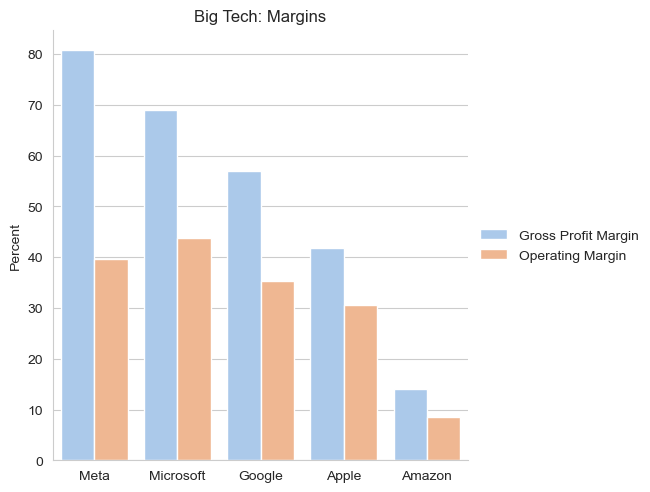

In [20]:
g = sns.catplot(
    data=margins_long, 
    x='Comp', 
    y='margin_value', 
    hue='margin_type', 
    kind='bar',
    order=['META', 'MSFT', 'GOOG', 'AAPL', 'AMZN'], palette='pastel'
    )

g.set(
    title='Big Tech: Margins', 
    xlabel='', 
    ylabel='Percent', 
    xticklabels = ['Meta', 'Microsoft', 'Google', 'Apple', 'Amazon']
    )
g._legend.set_title('')
g._legend.texts[0].set_text('Gross Profit Margin')
g._legend.texts[1].set_text('Operating Margin')
